# TMA4320 Introduksjon til vitenskapelige beregninger



# Liten git guide

## NB husk cell-> All output ->clear

åpne cmd
bruk cd (change directory) for å åpne mappen (>>cd FILPLASSERING)
for å 'pushe' (laste opp endringer du har gjort):
- git add FILNAVN  ( prosjekt3.ipynb)
- git commit -m "her kan du skive en liten commit meliding"
- git pull  
- git push


## Merge error
Hvis du får opp at det står conflict når du forsøket å bruke git pull skyldes dette at vi begge har redigert på det samme og vi må bestemme hva vi skal beholde. Når man bruker git pull legges begge endringene inn i fila, og man må gå inn å redigere hvem man skal beholde og hvem man skal slette. 
Eksempel:
fra før sto det t=100.
hvis den andre allerede har endret til t=200, men du prøvde å endre til t=300 vil fila se ca sånn ut etter å ha bruk git pull.

    "t=200   


problemet er at nar dette er lagt til får man ikke åpnet fila i jupyter notebook. Visual Studio fingerer derimot fint. Så åpne fila å slett det som ikke skal være der. Slik at det f.eks. står 
t=300 

Hvis du puller å får merge conflict må du bare: 
- Åpne fila i Visual Studio og rediger 
- git add
- git commit 
- git push 

# 2 Exercises

## 2.1 

Vis at 

$$ 
\begin{align}
  \tilde{\phi}(x,t)=\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}}
\end{align} 
$$

hvor D er en konstant oppfyller difusjonsligningen 

$$
\begin{align}
\frac{\partial \phi (x,t) }{\partial t}= D \frac{\partial^2 \phi (x,t)}{\partial x^2}.
\end{align}
$$


La oss først se på den tidsderiverte av $\tilde{\phi}$
$$
\begin{align}
\frac{\partial \tilde{\phi} (x,t)}{\partial t} &=\frac{\partial}{\partial t}\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}} \\
&=  \Big ( \frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi D t}} \Big )  e^{- \frac{(x-\mu)^2 }{4 D t}}
+ \frac{1}{\sqrt{4 \pi D t}}  \Big ( \frac{\partial}{\partial t}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )  \\
&=\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big[ \frac{-1/2}{t} + \frac{(x-\mu)^2}{4 D t^2} \Big].
\end{align}
$$

Vidre ser vi på den dobbelt deriverte mhp. x. 
$$
\begin{align}
 \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} &=\frac{\partial^2 }{\partial x^2} \frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}}  \\
&= \frac{\partial}{\partial x} \Big ( \frac{-2 (x-mu)}{4 D t}  \frac{1}{\sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )\\
&= \frac{1}{\sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big[   
\frac{-2}{4 D t} + \frac{4 (x-\mu)^2}{4^2 D^2 t^2}
\Big]
\end{align}
$$

Det kan nå lett ses at høyreside av diffusjonsligningen blir
$$
\begin{align}
D \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} =\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big[ \frac{-1/2}{t} + \frac{(x-\mu)^2}{4 D t^2} \Big],
\end{align}
$$
som er lik den tidseriverte av $\tilde{\phi}$ og dermed at funskjonen oppfyller diffusjonsligningen.  


////////////////////////////////////
HUSK: 
- tilde over phi 
- sjekk om det finnes en bedre måte å skrive e^x på 
- husk å sjekke komma og punktum 

## 2.2

### Kan fikses
- bedre bevis for at man får faktoren (-Dk^2) for hver gang man tidsderiverer. 
- bare gå over alle ligninger å se at de stemmer. 
- kanskje endre fra bruk av Fouriertrasformasjon til bruk av Rottman. 

### 2.2.1

La D være en konstant og start med partikkeldistrubisjonen 
$$
\begin{align}
\phi(x,0)=\delta (x-x_0).
\end{align}
$$

Her kan vi bruke at 

$$
\begin{align}
\delta (x-x_0) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk.
\end{align}
$$

Det gir at

$$
\begin{align}
\frac{\partial}{\partial t}\phi(x,t) \big |_{t=0} &= D \frac{\partial^2}{\partial x^2} \phi (x,t') \big |_{t'=0} = D \phi \frac{\partial^2}{\partial x^2}(x,0) \\
&=D \frac{\partial^2}{\partial x^2} \delta(x-x_0)  \\
&= D \frac{1}{2\pi} \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk \\
&= D \frac{1}{2\pi}  \int_{-\infty}^{\infty} (-ik)^2  e^{-ik(x-x_0)}dk  \\

\end{align}
$$

Dette kan generaliseres til at 

$$
\begin{align}
\big ( \frac{\partial}{\partial t} \big )^{n} \phi (x,t) \big |_{t=0} = (-Dk^2)^n \phi(x,t)
\end{align}
$$

For å finne $\phi(x,t)$ kan vi så se på Taylor utvikling av funskjonen. 


Dette kan brukes i taylor utviklingen

$$
\begin{align}
\phi (x,t) &= \phi (x,0) + \sum_{n=1}^{\infty} \frac{t^n}{n!} \frac{\partial^n 
\phi(x,t')}{\partial t'^n } 
\Big |_{t'=0}    \\
&=\phi(x,0)+ \sum_{n=1}^{\infty}  \int_{- \infty}^{\infty}  \frac{(-Dk^2t)^n}{n!}   e^{-ik(x-x_0}) \\
&= \frac{1}{2 \pi} \int_{- \infty}^{\infty} e^{-Dk^2t}e^{-ik(x-x_0}) dk
\end{align}
$$

En måte å løse dette integralet på er Fourier trasnformasjon. 
$$
\begin{align}
\hat{f}(w)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(z)  e^{-iwz}dz.
\end{align}
$$

Legg merke til at vis vi bytter variabler slik at $w=\tilde{x}=x-x_0$ og $z=k$, og lar $f$ også være avhengig av $t$ får vi
$$
\begin{align}
\hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(k,t)  e^{-i\tilde{x}k}dk.
\end{align}
$$

Ved å sette $f(k,t)=\frac{1}{\sqrt{2\pi}} e^{-Dtk^2}$ får vi 
$$
\phi(x,t)= \hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(k,t)  e^{-i\tilde{x}k}dk.
$$

# kilde her????
Det er kjent at   
$$
\begin{align}
f(x)=e^{-ax^2} \Longleftrightarrow \hat{f}(w)=\frac{1}{\sqrt{2a}}e^{-\frac{w^2}{4a} }. 
\end{align}
$$

Ved sammenligning ser vi da at 
$$
\begin{align}
\phi(x,t) &= \hat{f}(\tilde{x},t)= \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{2Dt}} e^{-\frac{\tilde{x}^2}{4Dt}}
= \frac{1}{\sqrt{4\pi Dt}} e^{-\frac{(x-x_0)^2}{4Dt}}
\end{align}
$$



### 2.2.2

Ved å studere resultatet fra oppgave 2.2.1 kan det ses at $D$ påvirker størrelsen av faktoren $4Dt$, og at den derfor vil si noe om hvor raskt systemet ender seg. Ved t=0 ser man at det kun er i $x=x_0$ at eksponenten er 0 og at uttrykket går mot $\infty$, for alle andre $x\neq x_0$ går eksponeneten mot $-\infty$ og utrykket mot 0. Dette skjer kun ved $t=0$, for t=0 ser man at uttrykket endrer seg slik at $\phi(x,t)$ flater seg ut. 

$\phi(x,t)$ fra oppgave 2.2.1 er en normalfordeling der variansen $\sigma^2=4Dt$. Variansen sier noe om spredningen av partikklene, slik at $D$ sier noe om hvor raskt spredningen endres. Jo større $D$ jo raskere spres partikklene. 

### 2.2.3 

Oppgave: Bruk resultatet fra oppgave 2.2.1 til å finne tidsutviklingen $\phi(x,t)$ gitt initial fordelingen $\phi (x,0) = g(x)$, hvor $g(x)$ er en vilkårlig funksjon.

For ås løse dette begynner vi med Taylor-utvikling som i opppgave 2.2.1.

$$
\begin{align} 
\phi(x,t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{\partial^n}{\partial t'^n} \phi(x, t') \Big |_{t'=0}
\end{align}
$$

Videre brukes diffusjonsligningen for å finne den tidsderiverteav $\phi$ evaluert i $t=0$, samt at $g(x)$ kan skrives som $g(x)=\int_{-\infty}^{\infty} g(y) \delta(y-x)$ 

$$
\begin{align} 
\frac{\partial}{\partial t} \phi(x,t) &= D \frac{\partial^2}{\partial x^2} \phi(x,t) \Big |_{t=0} \\
&= D \frac{\partial^2}{\partial x^2} g(x) \\
&= D \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} g(y) \delta(y-x) dy \\
&= D \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} g(y) \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-ik(y-x)} dk dy \\
&= \int_{-\infty}^{\infty} g(y) \frac{1}{2\pi} \int_{-\infty}^{\infty} (-Dk^2) e^{-ik(y-x)} dk dy \\
\end{align}
$$



Dette brukes videre i Taylor-utviklinga som i oppgave 2.2.1.

$$
\begin{align} 
\phi(x,t) &= \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} (-Dk^2)^n e^{-ik(y-k)} dk dy \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} \sum_{n=0}^{\infty} \frac{(-Dtk^2)^n}{n!}  e^{-ik(y-k)} dk dy \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} e^{-Dtk^2}  e^{-ik(y-k)} dk dy. \\
\end{align}
$$

De innerste intregralet ble løst i oppgave 2.2.1 og dermed kan dette skrives som
 
$$
\begin{align}
\phi(x,t) = \int_{-\infty}^{\infty} \frac{g(y)}{   \sqrt{4 \pi D t} } e^{  \frac{-(y-x)^2}{4 D t}  } dy
\end{align}
$$


# Oppgave 3

I koden nedenfor simuleres "random walk" i 1D. Dette gjøres ved å for hvert tidsintervall $\Delta t$ bestemme tilfeldig om en partikkel skal gå et steg til venstre eller ett steg til høyre. Her er det antatt at alle steg er like lange $h=1$, og partikkelen må gå enten til høyre, eller til venstre og kan ikke stå i ro. 

## Kodeforklaring 

For å velge om en partikkel går mot høyre eller venstre brukes funskjonen generateRandomStep() som tar inn sannmsynligheten, P, for at en partikkel går mot venstre. Denne er generell og brukes i senere oppgaver, men i denne oppgaven setter P= 0.5, slik at begge retninger er like sannsynlig. Funksjonen genererer et tilfeldig flytall mellom null og én ved bruk av funsksjonen random() fra random biblioteket. Funksjonen returnener -1 om der tilfeldige tallet er mindre enn P, og 1 om det er større.

Funskjonen randomParticlePosition() tar inn sannsynligheten for at en partikkel beveger seg mot venstre og antall steg per partikkel, n. Funkjsonen lar partikkelen starte i pos=0 og ved hjelp av generateRandomStep() plusser den på eller trekker fra 1 for hvert tilfeldige sted. Etter n antall steg returneres posisjonen. 

Alle partiklene slippes i i punktet $x=0$. Funksjonen plotMultipleParticlePos tar inn antall partikler, n, som skal slippes og hvor mange steg, t (hvor mange tidsintervall), hver av partiklene skal ta. I funskjonen oprettes en hvor sluttposisjonen til hver partikkel skal lagres. For hver partikkel brukes til funskjonen randomPariclePosition til å finne en tilfeldig posisjon for hver partikkel, basert på forklaringen ovenfor, og denne posisjonen lagres så i listen med posisjoner. Til slutt plottes posisjonene i et histogram, slik at høyden på hver søyle representerer andel partikkler. 

(-0.11, 10.065778658404922)


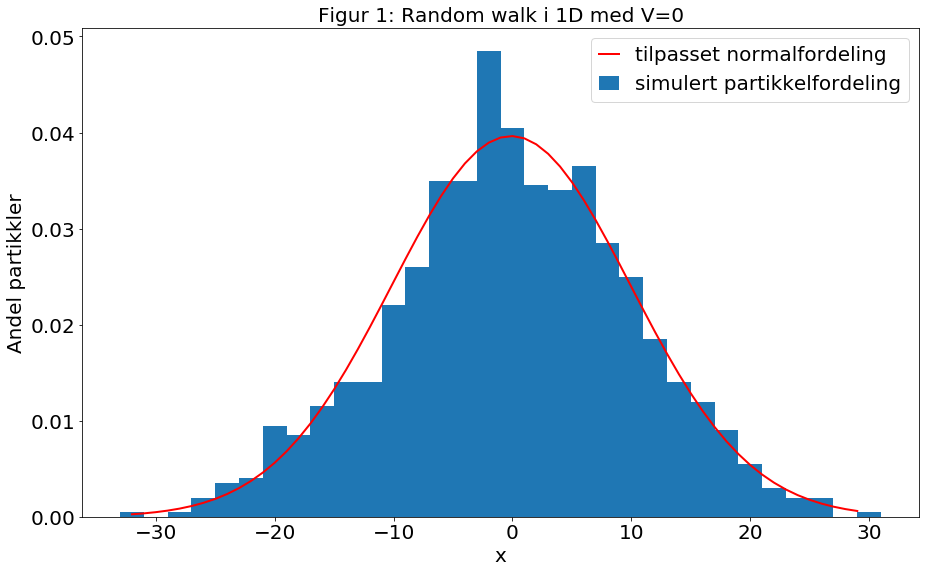

In [247]:
#Hvordan skal vi normere? må vi gjøre noe med både x-verdiene og y-verdiene?
#Skjedde mye rart da jeg skulle prøve å plotte med normalfordeling i samme plot...
#får ikke til å skalere


import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math



"""hjelpefunksjon for plotting av histogram"""
def plotParameters(posList):
    numOfPos=round(max(posList)-min(posList))+1 
    if numOfPos%2==0:
        numOfBins=numOfPos//2
        hmin=min(posList)-0.5
        hmax=max(posList)+0.5
    else: 
        numOfBins=numOfPos//2+1
        hmin=min(posList)-1
        hmax=max(posList)+1
    return  numOfBins, hmin, hmax



n=1000  #antall partikler
t=100   #antall tidssteg

#returnerer -1 for skritt mot venstre, og 1 for skritt mot høyre
#P er sannsynligheten for skritt mot venstre (for å kunne bruke i alle oppgaver)
def generateRandomStep(P): 
    randomNumber=random.random()
    if randomNumber<=P:
        return -1
    else:
        return 1

#returnerer 1 partikkels posisjon etter t tilfeldige skritt
def randomParticlePosition(t,P): 
    pos=0
    for i in range(t):
        step=generateRandomStep(P)
        pos+=step
    return pos

#plotter tilfeldige posisjoner for n antall partikler
#Kan bare ende på partall antall steg,så kan evt bare plotte dette (ikke odetall, blir da kurve ikke brått opp og ned graf)
def plotMultipleParticlesPos(n,t):
    listOfPositions=[]
    for i in range(n):           #for n partikler
        pos=randomParticlePosition(t,0.5)   #finner posisjon til partikkelen
        listOfPositions.append(pos)
    xList = np.arange(min(listOfPositions),max(listOfPositions),1)    
 
    #Skalerer listen, fordi total sannsynlighet må jo være 1

    parameters=norm.fit(listOfPositions) #normalfordeling tilpasset dataene
    print(parameters)
    fitted_pdf = norm.pdf(xList,loc = parameters[0],scale = parameters[1])
    
  
    numberOfBins, hmin, hmax = plotParameters(listOfPositions) 
    plt.plot(xList,fitted_pdf,"red",label='tilpasset normalfordeling') #normalfordelingskurve
    plt.hist(listOfPositions,density=True,bins=numberOfBins,range=(hmin,hmax),label='simulert partikkelfordeling')  #plotter dataene
    plt.title("Figur 1: Random walk i 1D med V=0")
    plt.ylabel("Andel partikkler")
    plt.xlabel("x")
    plt.legend()
    plt.show()
    
        
plotMultipleParticlesPos(n,t)



FIGUR 1: Figuren viser et histogram av andel partikkler per posisjon etter simulert  "random walk" i 1D. Den røde grafen viser normalfordeling best mulig tilpasset parikkelenes posisjon. 

## Forklaring av resultat 

Figur 1 viser hvordan fordelingen av parikler ble etter simlasjonen kjørt ovenfor. 

I oppgave 2 er initialfordelingen lik $\delta (x-x_0)$. I simulasjonen tilnærmes $\delta(x)$ ved å slippe alle partikklene i posisjon $x=0$. Videre ser vi fra oppgave 2 at ved denne initialfordelingen fås ved tidsutvikling en normalfordeling med standardavvik lik $\sigma^2=\sqrt{4Dt}$. Fra simulasjonen kan det ses at etter 100 steg er partikelfordelingen tilnærmet normalfordelt. Ujevnhetene i plottet figur 1 er ikke utover det som kan forventes med gitt antall partikler, og resultatet svarer til forventningene. 

# Oppgave 5 





In [ ]:
import scipy.constants

#k=0.05*scipy.constants.eV #hva skal vi sette denne?
T0=273+37
kb=scipy.constants.k
beta=1/(kb*T0) #??
h=1 #skrittlengde
t=100
n=1000


#Definerer potensialene

def V1(x):
    return x

def V2(x):
    if abs(x)<3*h:  #x>-3*h 3*hor x<3*h:
        return 1
    else:
        return 0
    
def V3(x):
    if x<-3*h:
        return -1
    elif x>3*h:
        return 1
    else:
        return (-1+2*((x+3*h)/6*h))
    
     
    
def plotParticlePositionInPotential(betaks,h,n,t,V,supTitle):
    listOfPosForPlotting =[]
    
    for betak in betaks: 
        posList=[]  #
        for i in range(n):#for n partikler
            pos=0
            for j in range(t): #t antall skritt
                PdivP=math.exp(-betak*(V(pos-h)-V(pos+h)))
                P=PdivP/(1+PdivP)
                step=generateRandomStep(P)
                pos+=step
            posList.append(pos);
        listOfPosForPlotting.append(posList)
    #print(posList)
    
    #numberOfBins , hmin, hmax = plotParameters(posList);
    #newHmin=hmin - ((hmin+t)//2)*2
    #newHmax=hmax + ((t-hmax)//2)*2
    #print(newHmin,newHmax)
    
    #newNumberOfBins = round(numberOfBins +((hmin+t)//2)+((t-hmax)//2)) 
    #newNumberOfBins=numberOfBins
    
        
    newparams = {'figure.figsize': (15, 9)}
    plt.rcParams.update(newparams)
    plt.suptitle(supTitle,fontsize=22)
    for i in range (1,len(betaks)+1):
        title = 'k= ' + str(betaks[i-1])
        plt.subplot(2,2,i)
        plt.hist(listOfPosForPlotting[i-1], density=True,bins=100, range=(-100,100))
        plt.title(title)
    
    #plt.subplot(2,2,2)
    #plt.hist(listOfPosForPlotting[1], density=True,bins=100, range=(-100,100))
    
    #plt.subplot(2,2,3)
    #plt.hist(listOfPosForPlotting[2], density=True,bins=100, range=(-100,100))
    
    #plt.subplot(2,2,4)
    #plt.hist(listOfPosForPlotting[3], density=True,bins=100, range=(-100,100))
    
    plt.show()
    

## 5.1

In [ ]:
betaks=[0.1,0.6,1.2,1.6]
title51="Figur 2: Random walk i 1D med V(x)=kx"
plotParticlePositionInPotential(betaks,h,n,t,V1,title51)



FIGUR 2: Plottet viser simulert partikkelfordeling etter at 1000 partikler har gått 100 steg i et potensiale $V(x)=kx$.  

## 5.2

In [ ]:
title52="Figur 3: Random walk i 1D med V(x)=k, for -3h < x <3h "
plotParticlePositionInPotential(betaks,h,n,t,V2,title52)

## 5.3 


### husk å si hva potensialet er 

In [ ]:
title53="Figur 4: Random walk i 1D med V(x)= f(x)"
plotParticlePositionInPotential(betaks,h,n,t,V3,title53)


# Oppgave 7


Endringer 02.04:
-fikset math range error. Tror den rosa "feilmeldingen" som kommer nå er ok fordi den bare betyr at det er tall som blir så små at python tolker dem som 0. 
-gjorde så randomWalkPotential returnerer listen med Vt og tList. Så kan man bruke det til plotting etter å ha kjørt funksjonen. tror det er bra å plotte ting som skal sammenliknes på samme plot, lettere å se forskjellene da. (MEN foreløpig ser jo alt helt likt ut???????)
-RandomWalkPotential tar nå inn verdier for V0_Na og V0_K, for å kunne brukes i oppgave 8.
-Tror ikke vi trenger å ha med partikkelfordelingene i oppgave 7 og 8 (?) kommenterte det ut
-Endret litt på oppgave 7.2 så den faktisk gjør det oppgaveteksten sier heh :))
-gjorde om funksjonene til V_Na og V_K til 1 funksjon, som tar inn V0_Na og V0_K (det var jo eneste forskjellen mellom dem...)
-ryddet litt her og der, gjerne ta vekk ting du har skrevet som ikke trengs lenger. + kommenterte 


BURDE KANSKJE GJØRES:
-Kan gjøre enda mer felles kode for Na og K, koden for dem er jo nesten lik. Kan feks kanskje lage en funksjon for alt som gjøres i RandomPotential funksjonen (generere steg, oppdatere liste over posisjoner, finne antall partikler inni, slette partikler som går utenfor systemet etc).
-Fikse fine, store plot med titler osv litt bedre enn jeg har gjort nå, hvertfall titler og enheter langs aksene osv fiksa bare kjapt
-Kommentere koden bedre
-Rydde vekk dritt som ikke trengs. Har allerede fjernet flere ubrukte konstanter og parametere, kan godt hende det er enda flere som kan fjernes

In [ ]:
"For å få store, tydelige plot"
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}
plt.rcParams.update(newparams)


In [315]:
#definerer konstanter
h=1
L=50
Cc=0.07*scipy.constants.e*scipy.constants.N_A   
x0=L/4

#Antall Na- og K-partikler ved start
NaB0=1450  
KB0=50
NaA0=50    #skriver B for utenfor cellen, og A for innenfor
KA0=1400

#Potensialet partiklene føler
def V1(x,Vt,Vt_prev,V0):  
    if x>=-h and x<=h: #inni cellemembranen
        return V0+(Vt/2-(Vt/(2*h))*x)   
    elif x<-h: #inni cellen
        return Vt
    else:  #utenfor cellen
        return 0



def randomWalkPotential(VNa,VK,nt,NaB0,NaA0,KB0,KA0,V0_Na,V0_K,pump=False): #hvilke parametere bør tas inn?
        #antall K- og Na- partikler utenfor og innenfor cellen
    KA=KA0
    NaA=NaA0
    
    NaPos=[-x0]*NaA+[x0]*NaB0  #liste over posisjon til hver Na-partiklene
    #legger til riktig antall utenfor og inni cellen
    KPos=[-x0]*KA+[x0]*KB0   #liste over posisjon til hver K-partikkel
    tList=np.arange(0,nt,1)   #liste med tidsverdier
    #QB=KB0+NaB0  #ladning utenfor    
    
    
    #ladning inni cellen (A) og utenfor cellen (b) (ved start), samt total ladningsforskjell:
    QA=KA0+NaA0
    QB=KB0+NaB0
    Q=QA-QB 
    
    VtList=[]   #tom liste for å legge potensialverdiene av Vt i              
    Vt=Q*(10/7)*1e-3 #potensial Vt ved start
    
    for i in range(nt):
        
        #regner ut potensialet V(t), og legger til verdien i listen VtList
        Vt_prev=Vt   #forrige verdi
        Vt=Q*(10/7)*1e-3 #ny verdi
        VtList.append(Vt)   
        Vte=Vt*scipy.constants.e
        #print(beta*Vte)
        
        #For Na-partiklene
        for j in range(len(NaPos)): #ser på en og en Na-partikkel
            #finner sannsynligheten for at partikkelen går et steg til venstre
            
                """test"""
                #print(VNa(NaPos[j]+h,Vte,Vt_prev,V0_Na)-VNa(NaPos[j]-h,Vte,Vt_prev,V0_Na))
                """end test"""
                
                
                PdivP_Na=np.exp(-beta*(VNa(NaPos[j]+h,Vte,Vt_prev,V0_Na)-VNa(NaPos[j]-h,Vte,Vt_prev,V0_Na))) 
                P_Na=1-PdivP_Na/(1+PdivP_Na)
                #print(NaPos[j], P_Na)
            #flytter partikkelen et steg 
                step=generateRandomStep(P_Na)
                NaPos[j]+=step
                #hvis partiklene på kanten av systemet
                if NaPos[j]<(-L/2-1):
                    NaPos[j]=-L/2
                if NaPos[j]>(L/2+1):
                    NaPos[j]=L/2
            
        #For K-partiklene
        for k in range(len(KPos)):
                PdivP_K=np.exp(-beta*(VK(KPos[k]+h,Vte,Vt_prev,V0_K)-VK(KPos[k]-h,Vte,Vt_prev,V0_K))) 
                P_K=1-PdivP_K/(1+PdivP_K)
                step=generateRandomStep(P_K)
                KPos[k]+=step
                #print(KPos[k], P_K)
                
                #hvis partiklene på kanten av systemet
                if KPos[k]<(-L/2-1):
                    KPos[k]=-L/2
                if KPos[k]>(L/2+1):
                    KPos[k]=L/2

        #pumpe: 

        if pump==True:
            pumpIons(NaPos,KPos)
        
                    
        #finner antall K-partikler inni cellen
        KA= 0
        for K in KPos:
            if K<-h:
                KA+=1
                    
        #Finner antall Na-partikler inni cellen
        NaA=0
        for Na in NaPos:
            #print(Na)
            if Na<-h:
                NaA+=1  
                
        #Finner total ladningsforskjell
        Q=(KA+NaA)-QB
        
    #binsNa,xminNa,xmaxNa=plotParameters(NaPos)
    #plt.hist(NaPos,bins=25,range=(-25,25))
    #plt.show()
    #plt.hist(KPos,bins=25,range=(-25,25))
    #plt.show()
    #plt.plot(tList,VtList)
    #print(VtList[500])
    #plt.show()
    
    return tList,VtList


def pumpIons(NaPos,KPos):
#     NaPos=NaPos.sort
    NaPos.sort()

    for p in range(len(NaPos)):
        if NaPos[p]>=-h:
            pNa=p  #indeks det første elementet som skal pumpes 
            break
    KPos.sort()

    for p in range(len(KPos)-1,-1,-1): #går baklengs gjenno KPos
        if KPos[p]<=h:
            pK =p #det første elem
            break

    try: 
        NaPos[pNa-1]=h
        NaPos[pNa-2]=h
        NaPos[pNa-3]=h
        KPos[pK]=-h
        KPos[pK+1]=-h
    except: 
        x=1
        #print("ikke nok ioner å pumpe")    #kan fjerne denne
    #return NaPos ,KPos
        

        

In [316]:
"""test pumpe"""
h=1

testList1=[7,3,2,4,5,2,-4,2,0,1,1,1,-1,-1,-1,-3,-2,-3]
testList2=[7,3,2,4,5,2,-4,2,0,1,1,1,-1,-1,-1,-3,-2,-3]

pumpIons(testList1,testList2)

print(testList1)
print(testList2)


[-4, 1, 1, 1, -1, -1, -1, 0, 1, 1, 1, 2, 2, 2, 3, 4, 5, 7]
[-4, -3, -3, -2, -1, -1, -1, 0, 1, 1, -1, -1, 2, 2, 3, 4, 5, 7]


In [318]:

V0=1/beta
nt=600

"""test"""
nt=50
NaB0=0
NaA0=10
KB0=10
KA0=0
"""end test"""

#V0*beta=0
tList,VtList0=randomWalkPotential(nt,NaB0,NaA0,KB0,KA0,0,0)
#V0*beta=1
tList,VtList1=randomWalkPotential(nt,NaB0,NaA0,KB0,KA0,V0,V0)
#V0*beta=3
tList,VtList3=randomWalkPotential(nt,NaB0,NaA0,KB0,KA0,V0*3,V0*3)


#plotter
plt.plot(tList,VtList0)
plt.plot(tList,VtList1)
plt.plot(tList,VtList3)
plt.xlabel("tid")
plt.ylabel("potensiale")
plt.title("Potensial per tid, med ulik V0")
plt.show()


        

TypeError: randomWalkPotential() missing 2 required positional arguments: 'V0_Na' and 'V0_K'

## 7.2

# husk å skriv detaljert på teorien her 


In [ ]:
V01=1/beta #det er verdien over brøkstreken som viser hva beta ganger V0K og V0Na er
#og det er jo de oppgaven oppgir verdier vi skal sette dem.
V02=10/beta


#Med beta*V0_Na=1 og beta*V0_K=10
tList,VtNa1=randomWalkPotential(V1,V1,nt,NaB0,NaA0,KB0,KA0,V01,V02)
#Med beta*V0_Na=10 og beta*V0_K=1
tList,VtNa10=randomWalkPotential(V1,V1,nt,NaB0,NaA0,KB0,KA0,V02,V01)

#plotter
plt.plot(tList,VtNa1)
plt.plot(tList,VtNa10)
plt.xlabel("tid")
plt.ylabel("potensiale")
plt.title("Potensial per tid, med ulik V0 for Na- og K-partiklene")
plt.show()

 # Oppgave 8

## 8.1

In [ ]:
#Definerer parametere
V_open=1/beta
V0=50/beta
nt=600



#Definerer potensialene
def V_Na_t(x,Vt,Vt_prev,V0):
    if (-0.007<Vt<0.03) and (Vt>Vt_prev):
        if x>=-h and x<=h:
            return V0+(Vt/2-(Vt/(2*h))*x)
        elif x<-h:
            return Vt
        else:
            return 0
    else:
        if x>=-h and x<=h:
            return V_open+(Vt/2-(Vt/(2*h))*x)
        elif x<-h:
            return Vt
        else:
            return 0
  


        
    
def V_K_t(x,Vt, Vt_prev,V0):
    if (-0.007<Vt<0.03) and Vt<Vt_prev:
        if x>=-h and x<=h:
            return V0+(Vt/2-(Vt/(2*h))*x)
        elif x<-h:
            return Vt
        else:
            return 0
    else:
        if x>=-h and x<=h:
            return V_open+(Vt/2-(Vt/(2*h))*x)
        elif x<-h:
            return Vt
        else:
            return 0
        
        


#Kjører randomWalkPotential uten pumpe    
tList,VtNoPump=randomWalkPotential(V_Na_t,V_K_t,nt,NaB0,NaA0,KB0,KA0,V0,V0)
#med pumpe
tList,VtPump=randomWalkPotential(V_Na_t,V_K_t,nt,NaB0,NaA0,KB0,KA0,V0,V0,True)

#plotter
plt.plot(tList,VtNoPump,label="uten pumpe")
plt.plot(tList,VtPump,label ="med pumpe" )
plt.xlabel("tid")
plt.ylabel("potensial")
plt.title("Potensial med og uten pumpe")
plt.legend()
plt.show()


## 8.2

 # Sigrids kode til oppgave 7 og 8
 
 
 ## Må fikses:
 - x0 tas ikke inn, men brukes

In [ ]:
for i in range(1000000):
    print("ÅÅÅÅneeiiiii, det funker ikke!!")

In [336]:
#definerer konstanter
h=1
L=50
Cc=0.07*scipy.constants.e*scipy.constants.N_A   
x0=L/4

#Antall Na- og K-partikler ved start
NaB0=1450  
KB0=50
NaA0=50    #skriver B for utenfor cellen, og A for innenfor
KA0=1400

#Potensialet partiklene føler
# def VNew(x,Vt,V0):
#     if x>=-h and x<=h: #inni cellemembranen
#         return V0+(Vt/2-(Vt/(2*h))*x)   
#     elif x<-h: #inni cellen
#         return Vt
#     else:  #utenfor cellen
#         return 0
    
def moveParticlesOneStep(posList,Vt,V0):

    #xph=posList+1  #posisjonene +h 
    #xmh=posList-1  #posisjonene -h
    
    Vxph=Vt*np.heaviside(-(posList+h),0.5)
    Vxph[np.where(abs(posList+h)<=h)]+=V0
    
    Vxmh=Vt*np.heaviside(-(posList-h),0.5)
    Vxmh[np.where(abs(posList-h)<=h)]+=V0
    
    #lager et array med PdivP
    PdivP=np.exp(-beta*(Vxph-Vxmh))
    P=1-PdivP/(1+PdivP)
    
    #lager et array med tilfeldige flyttall
    randomNumbers = np.random.rand(len(posList))
    
    steps=np.full(len(posList),1)                   #selvfølgelig helt feil lol 
    steps[np.argwhere(randomNumbers<P)]=-1 
    
    posList[np.where(posList<-25)]+=2 
    posList[np.where(posList>25)]-=2
    
    posList+=steps


def randomWalkPotentialNew(nt,Na_out,Na_in,K_out,K_in,VNa_closed,VK_closed,V_open,pump=False,gates=False): #hvilke parametere bør tas inn?
    tList= np.arange(0,nt,1)
    
    # lager array med posisjonene:
    NaPos=np.append(np.full(Na_in,-x0),np.full(Na_out,x0))   
    KPos= np.append(np.full(K_in,-x0),np.full(K_out,x0))
    
    #ladningsforskjell inni og utenfor cellen: 
    partIn=K_in+Na_in  #endres etter hvert steg
    partOut=K_out+Na_out  #konstant gjennom prosessen 
    diffPart=partIn-partOut  #differansen mellom antall partikler på utside og innside
    
    #liste hvor tidsutviklingen av spenningsdifferansen mellom innside og utside lagres
    VtList=[]   #tom liste for å legge potensialverdiene av Vt i              
    Vt=diffPart*(10/7)*1e-3 #potensial Vt ved start
    
    VNa=VNa_closed
    VK=VK_closed
    
    for i in range(nt):
        
        #regner ut potensialet V(t), og legger til verdien i listen VtList
        Vt=diffPart*(10/7)*1e-3 #ny verdi
        VtList.append(Vt)   
        Vte=Vt*scipy.constants.e
        
        #Åpne og lukke porter (for oppgave 8)
        if gates==True:
            if Vt>0.03:
                VNa=VNa_closed
                VK=V_open
            elif Vt<-0.07:
                V=VK_closed
                VNa=V_open 
        
        #Flytt partiklene
        moveParticlesOneStep(NaPos,Vte,VNa)
        moveParticlesOneStep(KPos,Vte,VK)

        #pumpe (for oppgave 8.2)
        if pump==True and i%10==0:
            if len(NaPos[NaPos<-h])>=3 and len(KPos[KPos>h])>2:   #hvis det finnes nok ioner å pumpe
                pumpIons(NaPos,KPos)
        
                    
        #finner antall K-partikler inni cellen
        K_in = len(KPos[KPos<-h])
        #Finner antall Na-partikler inni cellen
        Na_in =len(NaPos[NaPos<-h])
    
        #Finner total ladningsforskjell
        diffPart=(K_in+Na_in)-partOut
    
    return tList,VtList


def pumpIons(NaPos,KPos):
#   NaPos=NaPos.sort
    NaPos.sort()
    for p in range(len(NaPos)):
        if NaPos[p]>=-h:
            pNa=p  #indeks det første elementet som skal pumpes 
            break
    KPos.sort()
    for p in range(len(KPos)-1,-1,-1): #går baklengs gjenno KPos
        if KPos[p]<=h:
            pK =p #det første elem
            break
    try: 
        NaPos[pNa-1]=h
        NaPos[pNa-2]=h
        NaPos[pNa-3]=h
        KPos[pK]=-h
        KPos[pK+1]=-h
    except: 
        pass
        #print("ikke nok ioner å pumpe")    #kan fjerne denne
    #return NaPos ,KPos




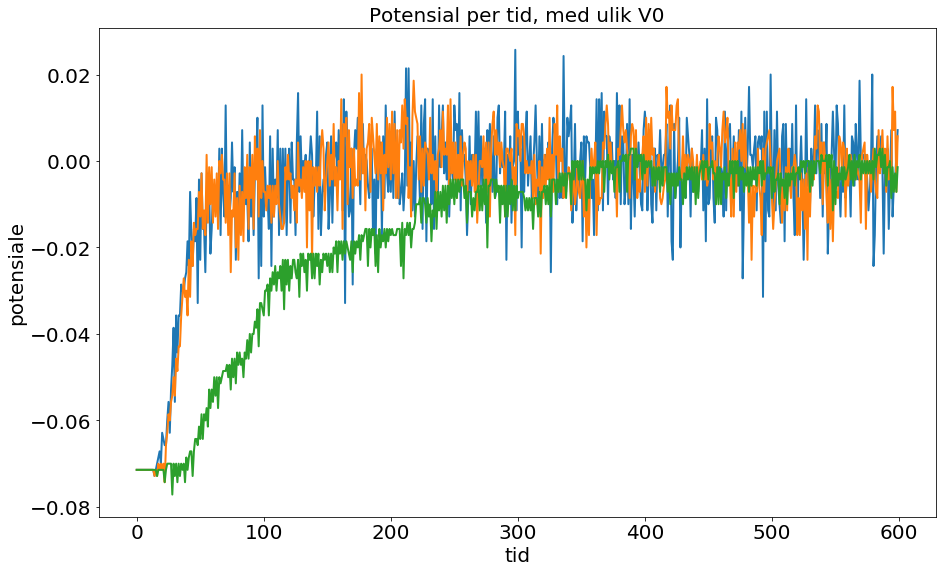

In [339]:
NaB0=1450  
KB0=50
NaA0=50    #skriver B for utenfor cellen, og A for innenfor
KA0=1400


V0=1/beta
nt=600



#V0*beta=0
tList,VtList0=randomWalkPotentialNew(nt,NaB0,NaA0,KB0,KA0,0,0,0)
#V0*beta=1
tList,VtList1=randomWalkPotentialNew(nt,NaB0,NaA0,KB0,KA0,V0,V0,0)
#V0*beta=3
tList,VtList3=randomWalkPotentialNew(nt,NaB0,NaA0,KB0,KA0,V0*3,V0*3,0)


#plotter
plt.plot(tList,VtList0)
plt.plot(tList,VtList1)
plt.plot(tList,VtList3)
plt.xlabel("tid")
plt.ylabel("potensiale")
plt.title("Potensial per tid, med ulik V0")
plt.show()



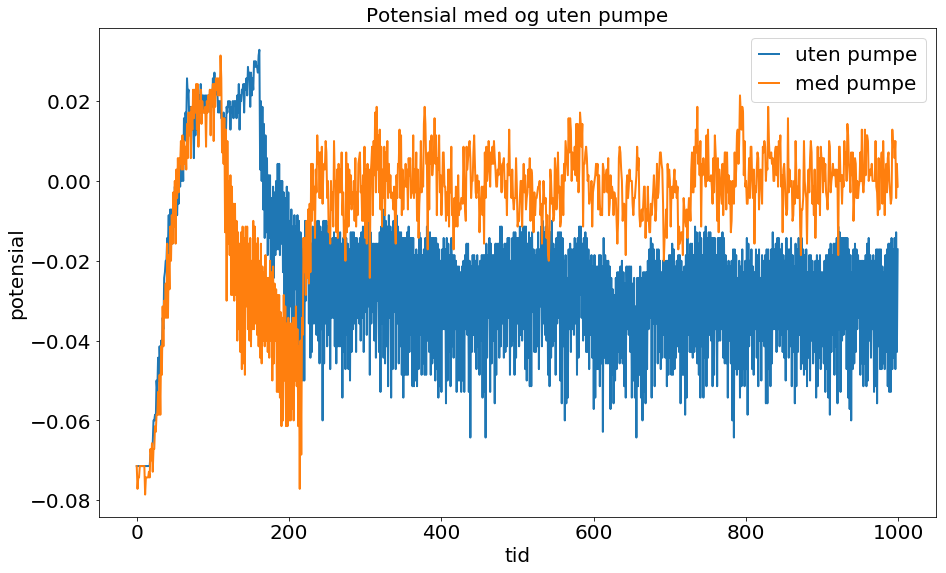

In [341]:
V_open=1/beta
V0=50/beta
nt=1000

#Kjører randomWalkPotential uten pumpe    
tList,VtNoPump=randomWalkPotentialNew(nt,NaB0,NaA0,KB0,KA0,V0,V0,V_open,pump=False,gates=True)
#med pumpe
tList,VtPump=randomWalkPotentialNew(nt,NaB0,NaA0,KB0,KA0,V0,V0,V_open,pump=True,gates=True)

#plotter
plt.plot(tList,VtNoPump,label="uten pumpe")
plt.plot(tList,VtPump,label ="med pumpe" )
plt.xlabel("tid")
plt.ylabel("potensial")
plt.title("Potensial med og uten pumpe")
plt.legend()
plt.show()

In [242]:
a=

[8 9]


In [287]:
V0=5
Vt=2
x=np.arange(-25,25,1)
Vx=Vt-Vt*np.heaviside(x,0.5)
Vx[np.where(abs(x)<=h)]+=V0
Vx+=1
print(Vx[:-1])

print(Vx[np.argwhere(x==0)])

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 8. 7. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[[7.]]
